In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("customer_churn_large_dataset.csv")

In [4]:
#lets check 5 rows
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [8]:
#lets check last rows
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [11]:
#lets check null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [12]:
df.shape

(100000, 9)

In [13]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [14]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


# Data Visualization

<AxesSubplot:>

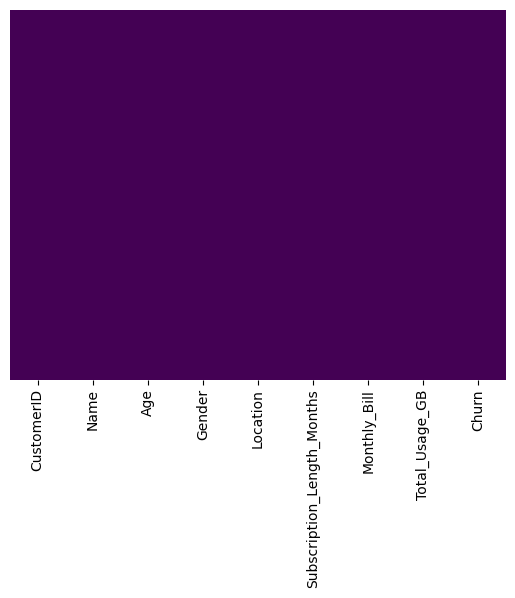

In [15]:
## We are using heatmap to check the null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

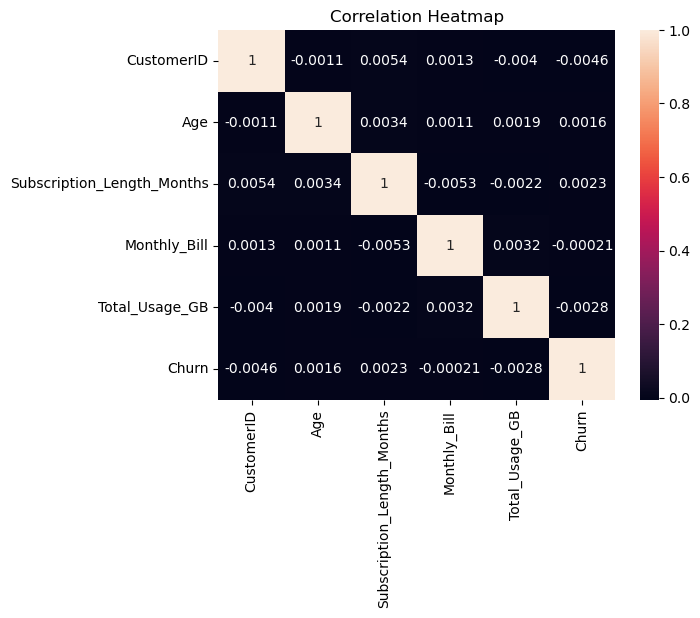

In [29]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

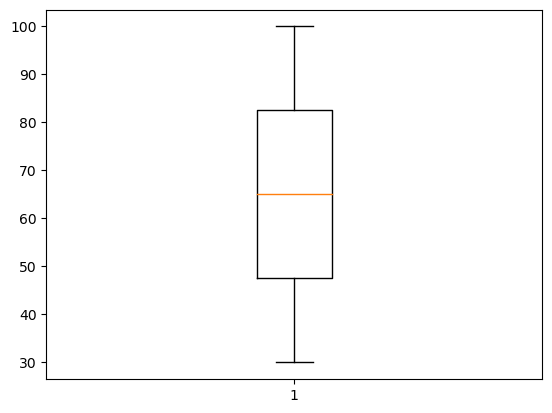

In [16]:
# Example box plot for a numerical feature
plt.boxplot(df['Monthly_Bill'])
plt.show()

In [18]:
from scipy import stats
z_scores = stats.zscore(df['Monthly_Bill'])
threshold = 3  # Choose an appropriate threshold
outliers = np.where(np.abs(z_scores) > threshold)

In [20]:
Q1 = df['Monthly_Bill'].quantile(0.25)
Q3 = df['Monthly_Bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Monthly_Bill'] < lower_bound) | (df['Monthly_Bill'] > upper_bound)]

In [21]:
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Q1: 47.54
Q3: 82.64
IQR: 35.1
Lower Bound: -5.1100000000000065
Upper Bound: 135.29000000000002


In [22]:
print(outliers)


Empty DataFrame
Columns: [CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn]
Index: []


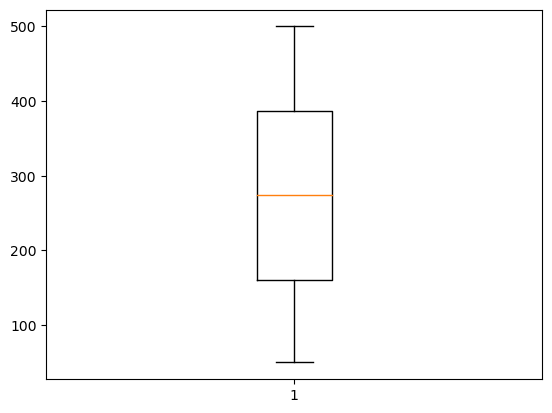

In [26]:
plt.boxplot(df['Total_Usage_GB'])
plt.show()

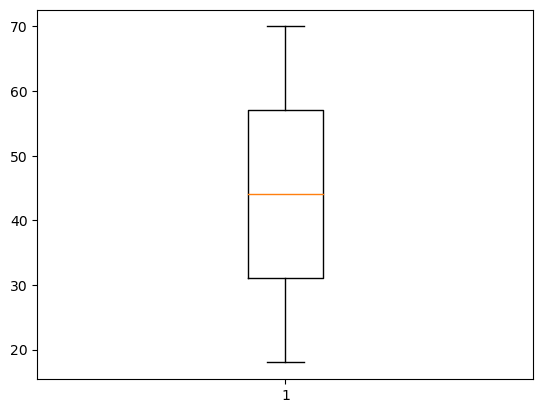

In [25]:
# Example box plot for a numerical feature
plt.boxplot(df['Age'])
plt.show()

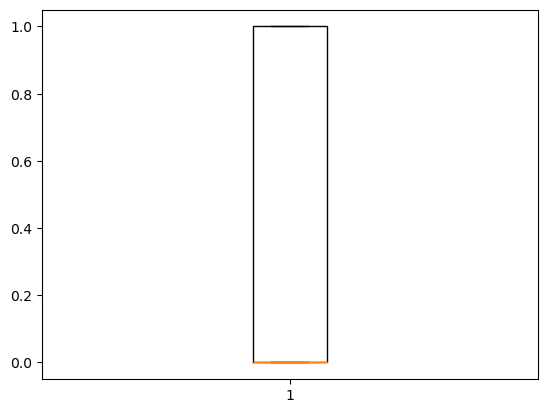

In [24]:
plt.boxplot(df['Churn'])
plt.show()

#### As we can see on above fig there is no outliers

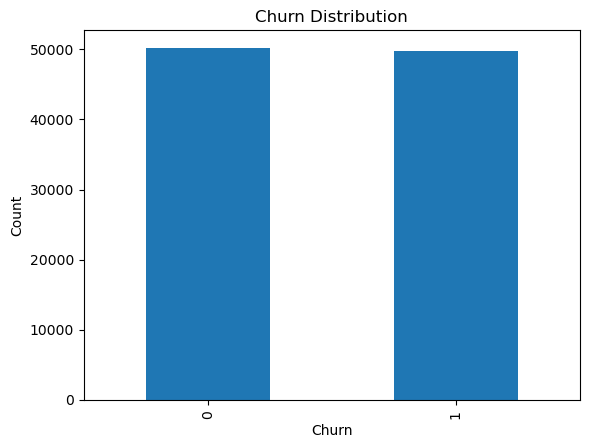

In [27]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [30]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=["Gender", "Location"], drop_first=True)

In [6]:
df

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,1,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,23,55.13,226,1,1,1,0,0,0
99996,99997,Customer_99997,62,19,61.65,351,0,0,0,0,0,1
99997,99998,Customer_99998,64,17,96.11,251,1,1,0,0,0,0
99998,99999,Customer_99999,51,20,49.25,434,1,0,0,0,0,1


# Train Test Split

In [4]:
# Split the data into features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [5]:
# Assuming "df" is your Pandas DataFrame
df.drop("CustomerID",axis=1, inplace=True)

In [6]:
df.drop("Name", axis=1, inplace=True)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
print("The Shape of X train:", X_train.shape)
print("The Shape of X test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)

The Shape of X train: (80000, 11)
The Shape of X test: (20000, 11)
The Shape of y_train: (80000,)
The Shape of y_test: (20000,)


In [9]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [10]:
# Select the columns  to include as features (excluding "CustomerID" "Name")
feature_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


In [11]:
# Create X_train and X_test with only the selected feature columns
X_train = X_train[feature_columns]
X_test = X_test[feature_columns]

In [12]:
# Now you can apply feature scaling to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print("The Shape of X train:", X_train.shape)
print("The Shape of X test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)

The Shape of X train: (80000, 4)
The Shape of X test: (20000, 4)
The Shape of y_train: (80000,)
The Shape of y_test: (20000,)


# Model Building

## Random Forest

In [17]:
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Model Evaluation
y_pred = model.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [74]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.50135
Precision: 0.49725100444068515
Recall: 0.47404495514565065
F1 Score: 0.48537076216523045
Confusion Matrix:
[[5324 4755]
 [5218 4703]]


## Logistic Regression

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = log_reg.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [79]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.4998
Precision: 0.49292894871357984
Recall: 0.29160366898498136
F1 Score: 0.36643445218492715
Confusion Matrix:
[[7103 2976]
 [7028 2893]]


# Thanku